In [16]:
import pandas as pd
import numpy as np
import scanpy as sc


sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

DataPath = "../../../Dataset/GSE94820_cleared/"

scanpy==1.8.1 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.3 pandas==1.2.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 pynndescent==0.5.2


In [9]:
genes = pd.read_csv('genes.csv',header=0)
umapValue = pd.read_csv('umap_RISC.csv',header=0)

anno = pd.read_csv('anno_RISC.csv',header=0,index_col=0)
anno

,scBarcode,scUMI,ngene,mito,celltype,sizefactor,Set,Barcode
batch1_CD141_P10_S73,CD141_P10_S73,1000000.31,5811,0,CD141,0.673450,batch1,batch1_CD141_P10_S73
batch1_CD141_P10_S74,CD141_P10_S74,1000000.38,4779,0,CD141,0.796830,batch1,batch1_CD141_P10_S74
batch1_CD141_P10_S75,CD141_P10_S75,1000000.17,5899,0,CD141,0.704869,batch1,batch1_CD141_P10_S75
batch1_CD141_P10_S76,CD141_P10_S76,1000000.07,4178,0,CD141,0.628760,batch1,batch1_CD141_P10_S76
batch1_CD141_P10_S77,CD141_P10_S77,999999.77,6128,0,CD141,0.735828,batch1,batch1_CD141_P10_S77
...,...,...,...,...,...,...,...,...
batch2_CD1C_P4_S44,CD1C_P4_S44,999999.90,4353,0,CD1C,0.723146,batch2,batch2_CD1C_P4_S44
batch2_CD1C_P4_S45,CD1C_P4_S45,999999.93,3722,0,CD1C,0.734324,batch2,batch2_CD1C_P4_S45
batch2_CD1C_P4_S46,CD1C_P4_S46,999999.93,3608,0,CD1C,0.690827,batch2,batch2_CD1C_P4_S46
batch2_CD1C_P4_S47,CD1C_P4_S47,1000000.21,4253,0,CD1C,0.724589,batch2,batch2_CD1C_P4_S47


In [11]:
anno.rename(columns={'Set':'batch'},inplace=True)
anno

,scBarcode,scUMI,ngene,mito,celltype,sizefactor,batch,Barcode
batch1_CD141_P10_S73,CD141_P10_S73,1000000.31,5811,0,CD141,0.673450,batch1,batch1_CD141_P10_S73
batch1_CD141_P10_S74,CD141_P10_S74,1000000.38,4779,0,CD141,0.796830,batch1,batch1_CD141_P10_S74
batch1_CD141_P10_S75,CD141_P10_S75,1000000.17,5899,0,CD141,0.704869,batch1,batch1_CD141_P10_S75
batch1_CD141_P10_S76,CD141_P10_S76,1000000.07,4178,0,CD141,0.628760,batch1,batch1_CD141_P10_S76
batch1_CD141_P10_S77,CD141_P10_S77,999999.77,6128,0,CD141,0.735828,batch1,batch1_CD141_P10_S77
...,...,...,...,...,...,...,...,...
batch2_CD1C_P4_S44,CD1C_P4_S44,999999.90,4353,0,CD1C,0.723146,batch2,batch2_CD1C_P4_S44
batch2_CD1C_P4_S45,CD1C_P4_S45,999999.93,3722,0,CD1C,0.734324,batch2,batch2_CD1C_P4_S45
batch2_CD1C_P4_S46,CD1C_P4_S46,999999.93,3608,0,CD1C,0.690827,batch2,batch2_CD1C_P4_S46
batch2_CD1C_P4_S47,CD1C_P4_S47,1000000.21,4253,0,CD1C,0.724589,batch2,batch2_CD1C_P4_S47


In [13]:
from anndata import AnnData
adata = AnnData(np.ones((576, 26593)), var=pd.DataFrame(index=genes['Unnamed: 0']),obs=anno)

In [14]:
adata.obsm['X_umap'] = umapValue.values[:,1:3]

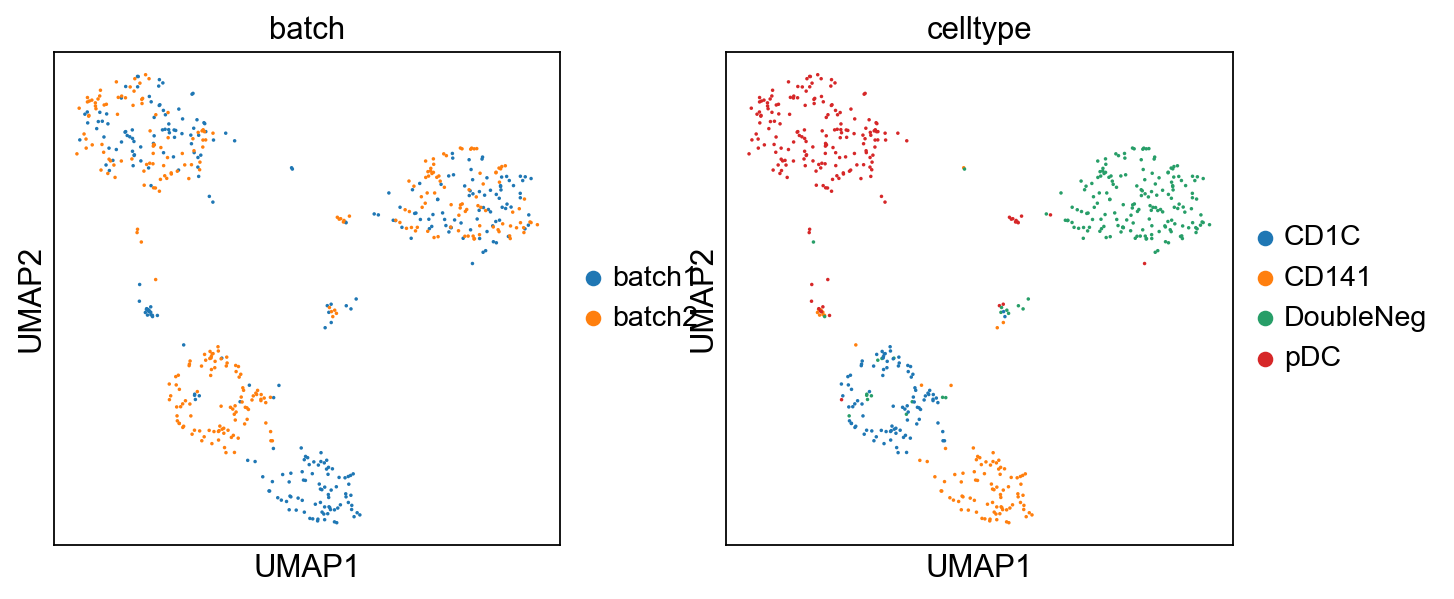

In [17]:
def output(Scadata,method):
    sc.pl.umap(Scadata, color=['batch','celltype'],s=10,save='UMAP_' + method + '.svg') #如何用矢量格式存？
    pd.DataFrame(Scadata.obsm['X_umap'],index = Scadata.obs.index,columns=['umap1','umap2']).to_csv(DataPath + method +'_lisi.csv')
    pd.DataFrame(Scadata.obsm['X_umap'].T, index=['umap1','umap2'], columns=Scadata.obs.index).to_csv(DataPath + method+'_kBET.csv')

    Scadata.obs.to_csv(DataPath + method+'_anno.csv')

output(adata,'RISC')